# Lab Course Machine Learning
## Exercise Sheet 3
### Prof. Dr. Dr. Lars Schmidt-Thieme, Hadi Samer Jomaa
Information Systems and Machine Learning Lab
University of Hildesheim
November 13th, 2017
Submission on November 20th, 2017 at 8:00 am, (on moodle, course code 3113)

## Exercise 1: Data preprocessing (5 Points)
You are required to pre-process given datasets.
1.  Convert any non-numeric values to numeric values.  For example you can replace a country name with an integer value or more appropriately use hot-one encoding.   [Hint:  use hashmap (dict) or pandas.get_dummies]. Please explain your solution.
2.  If required drop out the rows with missing values or NA. In next lectures we will handle sparse data, which will allow us to use records with missing values.
3.  Split the data into a train(80%) and test(20%)

### Data set 1: Airfares and passengers for U.S. Domestic Routes for 4th Quarter of 2002
This data shows the information gathered from differents US Airlines and the variation of the fare across different routes. 
Fares shown in the dataset, represent the average fare value, vs the values offered by the Leading and Low prices airlines correspondingly



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Fl_N = ["Cy2", "Cy1", "Avfare","Dist","Wkpss","Airhigh","Mshigh","Fhigh","Airlow","Mslow","Flow"]
Fl = pd.read_table("http://www.stat.ufl.edu/~winner/data/airq402.dat",header=None, sep="\s+",names=Fl_N)
fl = Fl

msk = np.random.rand(len(fl)) < 0.8  #Random assign
tr = fl[msk]
tst = fl[~msk]



In the data set, the no-numerical values correspond to:
   1. Departing City
   2. Arriving City
   3. Airline

But, although in the data set those values can be transformed in to numerical values, is not recomended to use them  as predictors, mainly because the number of airlines or the number of flights arriving/departing each city is not well balanced, and could lead to wrong interpretations of the resulting model.
For example, is unequal to compare the city TPA which has 46 differents available destinies and a market of at least 12 airlines vs City AUS wich only has 1 comercial route and a market is composed of 1 airline
It would be important to try to discover if there is any important marketing strategy 

In [9]:
for i in fl.Cy1.unique():
    ALV = []
    print("Routes departing from ",i,"= ",fl[fl.Cy1 == i].Cy1.count())
    print("City ",i,"Leading Airlines =",fl[fl.Cy1 == i].Airhigh.unique())

Routes departing from  ATL =  3
City  ATL Leading Airlines = ['FL' 'DL']
Routes departing from  MCO =  43
City  MCO Leading Airlines = ['FL' 'WN' 'DL' 'NK' 'US' 'TZ' 'CO' 'AA' 'F9' 'NW' 'UA' 'YX']
Routes departing from  BWI =  4
City  BWI Leading Airlines = ['WN' 'DL']
Routes departing from  ORD =  9
City  ORD Leading Airlines = ['UA' 'AA' 'DL' 'WN' 'US']
Routes departing from  FLL =  14
City  FLL Leading Airlines = ['WN' 'DL' 'NK' 'US' 'TZ' 'CO' 'AA']
Routes departing from  LAS =  26
City  LAS Leading Airlines = ['WN' 'DL' 'HP' 'US' 'UA' 'CO' 'G4' 'AA' 'NW' 'TZ']
Routes departing from  LAX =  27
City  LAX Leading Airlines = ['DL' 'WN' 'AA' 'AS' 'US' 'UA' 'CO' 'HP' 'NW']
Routes departing from  TPA =  46
City  TPA Leading Airlines = ['US' 'DL' 'NK' 'WN' 'TZ' 'CO' 'AA' 'UA' 'FL' 'NW' 'B6' 'HP']
Routes departing from  DFW =  16
City  DFW Leading Airlines = ['WN' 'DL' 'AA']
Routes departing from  DEN =  12
City  DEN Leading Airlines = ['UA' 'DL' 'US' 'AA']
Routes departing from  IAH =  20


In any case, the usage of dummies is shown bellow (It creates new columns for City 1 (Cy1) City 2 (Cy2) and the leading Airlines:

In [11]:
pd.get_dummies(fl)

,Avfare,Dist,Wkpss,Mshigh,Fhigh,Mslow,Flow,Cy2_ABQ,Cy2_ACY,Cy2_ALB,...,Airlow_G4,Airlow_HP,Airlow_NK,Airlow_NW,Airlow_SY,Airlow_TZ,Airlow_UA,Airlow_US,Airlow_WN,Airlow_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,135.17,1204,199.02,40.68,137.97,17.09,127.69,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,152.85,2237,237.17,59.94,148.59,59.94,148.59,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,190.73,2467,191.95,17.89,205.06,16.59,174.00,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,129.35,1073,550.54,76.84,127.69,76.84,127.69,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9,134.17,1130,202.93,35.40,132.91,26.40,124.78,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Fares from Low Price Airlines and Market Shares
#### Insights:


In the graph bellow it is observed that one of the marketing strategies of the airlines with a low share market is to offer their flight with a lower value than the target.
This behaviour is strongly observed for companies with share market lower than 20%. With a SM>50% the prices of the LP airlines get closer to the target

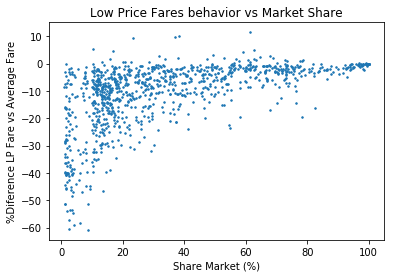

In [16]:
plt.plot(fl.Mslow, ((fl.Flow-fl.Avfare)*100/fl.Avfare),'o',markersize=1.5)
plt.xlabel("Share Market (%)")
plt.ylabel("%Diference LP Fare vs Average Fare")
plt.title("Low Price Fares behavior vs Market Share")
plt.show()

### Fares from Leading Airlines and Market Shares
#### Insights:

On the other hand, when an airline has the leading market share, it is observed that they can use the advantage in both ways:
1) The could be the leading airline because the ofer a price bellow the target
2) The use their stron position in the market to offer prices that are above the average.
This behaviour is common on airlines that have a good reputation and have a fewer user's penalization for the increase of the price
As the market share closes to 100% it is observed that the difference between the fare-Av fare closes, as the fare price is dictated for that airline

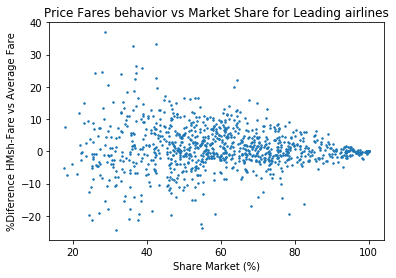

In [19]:
plt.plot(fl.Mshigh, (fl.Fhigh-fl.Avfare)*100/fl.Avfare,'o',markersize=1.5)
plt.xlabel("Share Market (%)")
plt.ylabel("%Diference HMsh-Fare vs Average Fare")
plt.title("Price Fares behavior vs Market Share for Leading airlines")
plt.show()

# USD/Mi vs average passengers 
Other option to modelate the market share also observinb hoy the "unitary" price (in USD) per mille of travel, changes in comparison of average number of passenger in each city.
In the graph bellow it is observed that the unitary price of travelling mille changes per city in relation of their demand
At higher user rate, lower price and viceverce


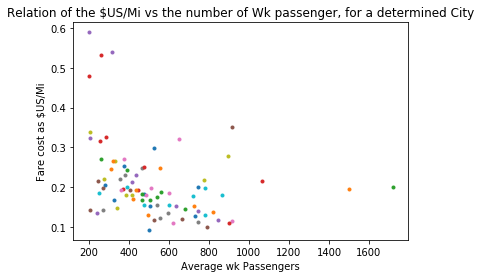

In [21]:
for i in fl.Cy1.unique():
    plt.plot(fl[fl.Cy1 == i].Wkpss.mean(),fl[fl.Cy1 == i].Avfare.sum()/fl[fl.Cy1 == i].Dist.sum(),'o', markersize=3)
plt.title("Relation of the $US/Mi vs the number of Wk passenger, for a determined City")
plt.ylabel("Fare cost as $US/Mi")
plt.xlabel("Average wk Passengers")
plt.show()


For the previous points, it is not recomendable to use the variables of airlines or city as part of the modeling (such that results imbalanced), and instead the usage of only the Distance, Av Fare, Low Price Fare, Leading Airline, and Weekly Passenger will be used to try to modelate an optimum Market Share.


In [ ]:
Xtr = np.array([tr.Avfare, tr.Fhigh, tr.Flow, tr.Wkpss,tr.Dist]).T
Xtst = np.array([tst.Avfare, tst.Fhigh,tst.Flow,tst.Wkpss,tst.Dist]).T
Ytr = np.array([tr.Mshigh]).T
Ytst  = np.array([tst.Mshigh]).T
A = np.vstack([Xtr.T, np.ones(len(Xtr))]).T




### Exercise 2: Linear Regression with Gradient Descent (15 Points)
#### Part A: (8 Points): Implement Linear Regression with Gradient Descent
In this part you are required
to implement linear regression algorithm with gradient descent algorithm.  Reference lecture
https://
www.ismll.uni-hildesheim.de/lehre/ml-16w/script/ml-02-A1-linear-regression.
pdf
For each dataset given above
1.  A set of training data Dtrain={(x(1),y(1)),(x(2),y(2)),...,(x(N),y(N))}, wherex∈RM,y∈R,Nis number of training examples andMis number of features
2.  Linear Regression model is given as ŷn= ∑βmxm
3.  Least square loss function is given as l(x,y) = ∑(y − ŷ)² 
4.  Minimize the loss function l(x,y) using Gradient Descent algorithm. Implement (learn-linregGD and minimize-GD algorithms given in the lecture slides). Choose i max between 100 to 1000.

5. You can choose three suitable values of step length α > 0 . For each value of step length perform the learning and record.

    (a)  In each iteration of the minimize-GD algorithm calculate |f(xi−1) − f(xi)| and at the end of learning, plot it against iteration number i. Explain the graph. 
    
    (b)  In each iteration step also calculate RMSE, and at the end of learning plot it against iteration number i. Explain the graph.

<img src ="GDEq.png"/>

##### Number of iterations = 500   
###### Alpha choosen = 1e-9, 1e-10, 1e-12 (Higher than 1e-9 the algorithm diverges)
###### |f(xi−1) − f(xi)| vs i , and RSME vs i
In both graphs are shown two types of error, calcularet for each iteration, and in both cases the behaviour is equial. These plots show how each iteration minimize each Error, related to a level of Beta(i) vs Beta(i-1) assuring that the value of Betas is improved in each time. Using a smalle value of alpha, also show a slower (smaller) slope, thus taking a higher amount of iteration to achieve the same results as the one using a higher alpha





In [49]:
def LearnLinearRegGD(NumOfIterations,Alpha):
    A = np.vstack([Xtr.T, np.ones(len(Xtr))]).T
    Ytr = np.array([tr.Mshigh]).T
    B1 = np.array([[0,0,0,0,0,0]]) #Inizialization
    B = B1.T
    print("Initial value of B is")
    print(B)
    print("")
    n= 0 #Controler
    ALV = []
    ALV2 = []
    while n< NumOfIterations:
        Error = (np.dot(A,B) - Ytr)
        Bn = B- Alpha*np.dot(A.T,Error) #Bn Stand for "The next set of Betas"
        A2 = np.sum(np.abs(np.dot(A,B)-np.dot(A,Bn)))
        ALV2.append(A2)
        B = np.array(Bn) #The previous value of B is substitued by the new Bn
        A1 = (np.sum(Error**2)/len(Error))**0.5
        ALV.append(A1)
        if n<10:
            if n== 0:
                print("Bellow are showed only the Squared error of the first 10 Iterations")
                print("The initial squared error is",A1)
            else:
                print("Squared error ot iteration#",n,"is: ",A1)
        n = n+1
    else:
        print("...")
        print("Final Squared error of iteration ",n,"is",A1)
        print(B)
        plt.plot(ALV)
        plt.xlabel("Iterations")
        plt.ylabel("SQME")
        plt.title("SQMError vs Iterations")
        plt.show()
        plt.plot(ALV2)
        plt.xlabel("Iterations")
        plt.ylabel("|X-1 - Xi|")
        plt.title("Error vs Iterations")
        plt.show()

Initial value of B is
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]]

Bellow are showed only the Squared error of the first 10 Iterations
The initial squared error is 63.6539986009
Squared error ot iteration# 1 is:  49.1368828643
Squared error ot iteration# 2 is:  42.7140136118
Squared error ot iteration# 3 is:  40.0776125033
Squared error ot iteration# 4 is:  38.9864317833
Squared error ot iteration# 5 is:  38.4793477779
Squared error ot iteration# 6 is:  38.1866166624
Squared error ot iteration# 7 is:  37.972581757
Squared error ot iteration# 8 is:  37.788367074
Squared error ot iteration# 9 is:  37.6164692856
...
Final Squared error of iteration  500 is 28.0969152886
[[ 0.15934167]
 [ 0.1159367 ]
 [ 0.14661762]
 [ 0.01001109]
 [-0.01861002]
 [ 0.00347123]]


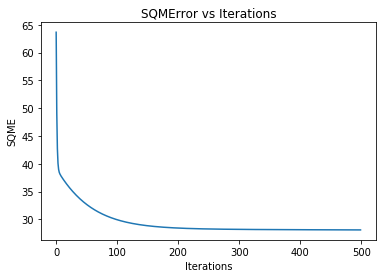

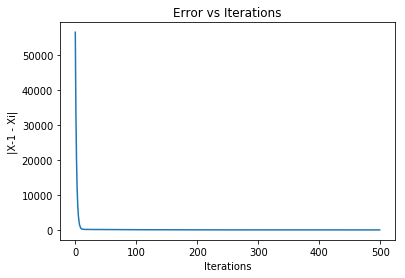

In [101]:
LearnLinearRegGD(500,1e-9)

Initial value of B is
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]]

Bellow are showed only the Squared error of the first 10 Iterations
The initial squared error is 63.6539986009
Squared error ot iteration# 1 is:  57.561890332
Squared error ot iteration# 2 is:  52.8319823101
Squared error ot iteration# 3 is:  49.2124391227
Squared error ot iteration# 4 is:  46.4806235078
Squared error ot iteration# 5 is:  44.4441575177
Squared error ot iteration# 6 is:  42.941648208
Squared error ot iteration# 7 is:  41.8418850575
Squared error ot iteration# 8 is:  41.0413091649
Squared error ot iteration# 9 is:  40.4602623995
...
Final Squared error of iteration  500 is 32.7028062668
[[ 0.061001  ]
 [ 0.05841919]
 [ 0.05329283]
 [ 0.017081  ]
 [ 0.00909725]
 [ 0.00057848]]


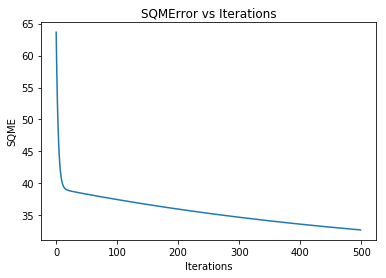

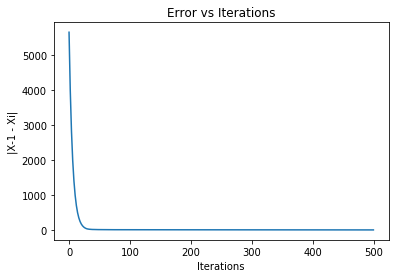

In [51]:
LearnLinearRegGD(500,1e-10)

Initial value of B is
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]]

Bellow are showed only the Squared error of the first 10 Iterations
The initial squared error is 63.6539986009
Squared error ot iteration# 1 is:  63.3393659179
Squared error ot iteration# 2 is:  63.0281881915
Squared error ot iteration# 3 is:  62.7204366014
Squared error ot iteration# 4 is:  62.4160824727
Squared error ot iteration# 5 is:  62.1150972751
Squared error ot iteration# 6 is:  61.8174526216
Squared error ot iteration# 7 is:  61.5231202679
Squared error ot iteration# 8 is:  61.2320721108
Squared error ot iteration# 9 is:  60.9442801876
...
Final Squared error of iteration  500 is 38.7692900663
[[  7.35510911e-03]
 [  7.36660243e-03]
 [  6.39889016e-03]
 [  1.99703252e-02]
 [  2.63190437e-02]
 [  5.31438792e-05]]


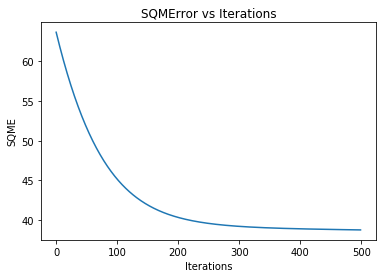

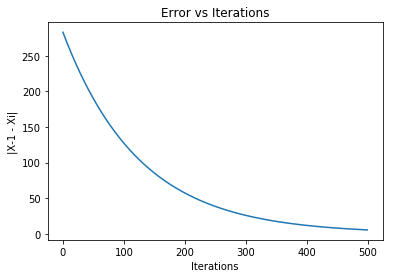

In [58]:
LearnLinearRegGD(500,5e-12)

### Part B: (7 Points): Step Length for Gradient Descent
This  task  is  based  on  Part  A.  

You  have  to implement two algorithms steplength-armijo and step-length bold driver given in the lecture slides. 

#### For each step length Algorithm:

1.  In each iteration of the minimize-GD algorithm calculate |f(xi−1) − f(xi)| and at the end of learning, plot it against iteration number i . Explain the graph. 

2.  In each iteration step also calculate RMSE on test and at the end of learning, plot it against iteration number i . Explain the graph. 

3. Compare the RMSE graphs of steplength-armijo and steplengthbolddriver and the three fixed step length. Explain your graph

<img src ="ARMJ.png"/>

In [115]:
def Armijo(Alpha,Delta): #Delta must be [0,1]!!!!
    A = np.vstack([Xtr.T, np.ones(len(Xtr))]).T 
    Ytr = np.array([tr.Mshigh]).T
    B1 = np.array([[0,0,0,0,0,0]]) #x in the slide equation
    B = B1.T
    #Alpha= 1
    Err = Ytr - np.dot(A,B)
    Der = -2*Alpha*Delta*np.dot(A.T,Err)
    D1 = np.dot(Err.T,Err) - np.dot(Der.T,Der)
    Iz = np.dot((Ytr- np.dot(A,(B - Alpha*Der))).T,(Ytr- np.dot(A,(B - Alpha*Der))))
    ALV3 = []
    ALV4 = []
    print("Alpha values descent:")
    while Iz > D1:
        W1 = np.sum(Iz)
        Alpha = Alpha/2
        Der = -2*Alpha*Delta*np.dot(A.T,Err)
        D1 = np.dot(Err.T,Err) - np.dot(Der.T,Der)
        Iz = np.dot((Ytr- np.dot(A,(B - Alpha*Der))).T,(Ytr- np.dot(A,(B - Alpha*Der))))
        W2 = np.sum(Iz)
        ALV3.append(abs(W1-W2))
        ALV4.append(np.sum(Iz))
        print(Alpha)
    else:
        plt.plot(ALV3)
        plt.xlabel("Iterations")
        plt.ylabel("|Xi-1 - Xi|")
        plt.title("Error vs Iterations")
        plt.show()
        plt.plot(ALV4)
        plt.xlabel("Iterations")
        plt.ylabel("SQME")
        plt.title("SQMError vs Iterations")
        plt.show()
        print("Final value of Alpha is:")
        print(Alpha)

Alpha values descent:
50.0
25.0
12.5
6.25
3.125
1.5625
0.78125
0.390625
0.1953125
0.09765625
0.048828125
0.0244140625
0.01220703125
0.006103515625
0.0030517578125
0.00152587890625
0.000762939453125
0.0003814697265625
0.00019073486328125
9.5367431640625e-05
4.76837158203125e-05
2.384185791015625e-05
1.1920928955078125e-05
5.9604644775390625e-06
2.9802322387695312e-06
1.4901161193847656e-06
7.450580596923828e-07
3.725290298461914e-07
1.862645149230957e-07
9.313225746154785e-08
4.6566128730773926e-08
2.3283064365386963e-08
1.1641532182693481e-08
5.820766091346741e-09
2.9103830456733704e-09
1.4551915228366852e-09


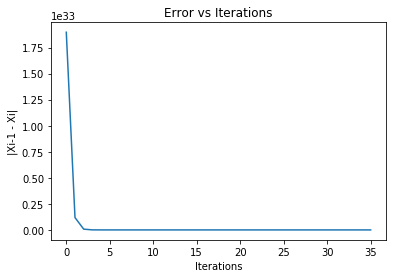

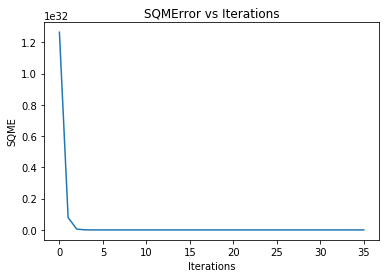

Final value of Alpha is:
1.4551915228366852e-09


In [113]:
    Armijo(100,1)

<img src ="BLD.png"/>


In [1]:
def BoldDriver(Alpha,AlphaP,AlphaM): #AlphaM must be [0,1]
    A = np.vstack([Xtr.T, np.ones(len(Xtr))]).T 
    Ytr = np.array([tr.Mshigh]).T
    B1 = np.array([[0,0,0,0,0,0]]) #x in the slide equation
    B = B1.T
    ALP = Alpha*AlphaP
    Err = Ytr - np.dot(A,B)
    Der = -2*ALP*np.dot(A.T,Err)
    Iz = np.dot(Err.T,Err) - np.dot((Ytr- np.dot(A,(B - ALP*Der))).T,(Ytr- np.dot(A,(B - ALP*Der))))
    ALV3 = []
    ALV4 = []
    print("Alpha values descent:")
    while Iz>0:
        W1 = np.sum(Iz)
        ALP = ALP*AlphaM
        Der = -2*ALP*np.dot(A.T,Err)
        D1 = np.dot(Err.T,Err) - np.dot(Der.T,Der)
        Iz = np.dot((Ytr- np.dot(A,(B - Alpha*Der))).T,(Ytr- np.dot(A,(B - Alpha*Der))))
        W2 = np.sum(Iz)
        ALV3.append(abs(W1-W2))
        ALV4.append(np.sum(Iz))
        print(Iz)
    else:
        plt.plot(ALV3)
        plt.xlabel("Iterations")
        plt.ylabel("|Xi-1 - Xi|")
        plt.title("Error vs Iterations")
        plt.show()
        plt.plot(ALV4)
        plt.xlabel("Iterations")
        plt.ylabel("SQME")
        plt.title("SQMError vs Iterations")
        plt.show()
        print("Final value of Alpha is:")
        print(Alpha)